In [2]:
# Importing the required libraries
import pandas as pd

In [4]:
# readong the csv file using pandas library
data=pd.read_csv(r'C:\Users\pavan\Downloads\un-general-debates-blueprint.csv')

In [5]:
# Observing the first 5 records
data.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


In [6]:
# Observing the shape of the dataframe
data.shape

(7507, 7)

In [7]:
# Observing the column names in the dataframe
data.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

In [8]:
# Observing the data types in the dataframes
data.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [9]:
# Describe the statistical description of the data
data.describe()

,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


In [10]:
# In this describe method, checking the statistical description of the dtype:object of the columns in the dataframe
data.describe(include='O')

,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,ALB,Albania,Seyoum Mesfin,Minister for Foreign Affairs,33: May I first convey to our President the co...
freq,46,46,12,1813,1


In [11]:
# Creating a new column length from the text column dataframe 
data['length']=data['text'].str.len()

In [12]:
# Observing the sum of the null values in the dataframes
data.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [13]:
# Replacing the na values with the unknown value
data['speaker'].fillna('unknown',inplace=True)
data['position'].fillna('unknown',inplace=True)
data.isna().sum()

session         0
year            0
country         0
country_name    0
speaker         0
position        0
text            0
length          0
dtype: int64

In [14]:
# Observing the unique speakers in the column name in the dataframe
data['speaker'].unique()

array(['Mr. NAS', 'Mr. DE PABLO PARDO', 'Mr. McMAHON', ...,
       'Mr. Abdrabuh Mansour Hadi Mansour', 'Mr. Tomislav Nikolić',
       'Mr. Edgar Chagwa Lungu'], dtype=object)

In [15]:
# Checking whether the string contains bush
data[data['speaker'].str.contains('BUSH')]

,session,year,country,country_name,speaker,position,text,length
2876,45,1990,USA,United States,GEORGE BUSH,unknown,﻿\nIt is really a great privilege to greet you...,15843
3207,47,1992,USA,United States,Mr. George BUSH,President,"Forty-seven years ago I was a young man of 21,...",21105


BOXPLOT

<Axes: >

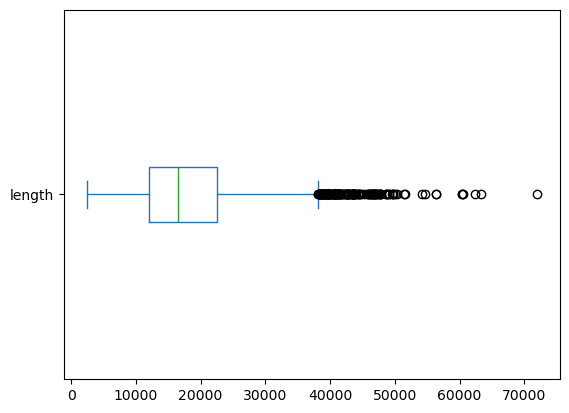

In [16]:
# Plotting boxplot for the column length
data['length'].plot(kind='box', vert=False)

HISTOGRAM

<Axes: ylabel='Frequency'>

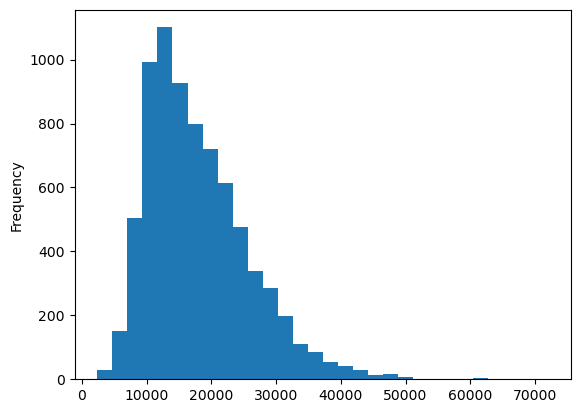

In [17]:
# Plotting histogram for the column length
data['length'].plot(kind='hist', bins=30)

BOXPLOTS

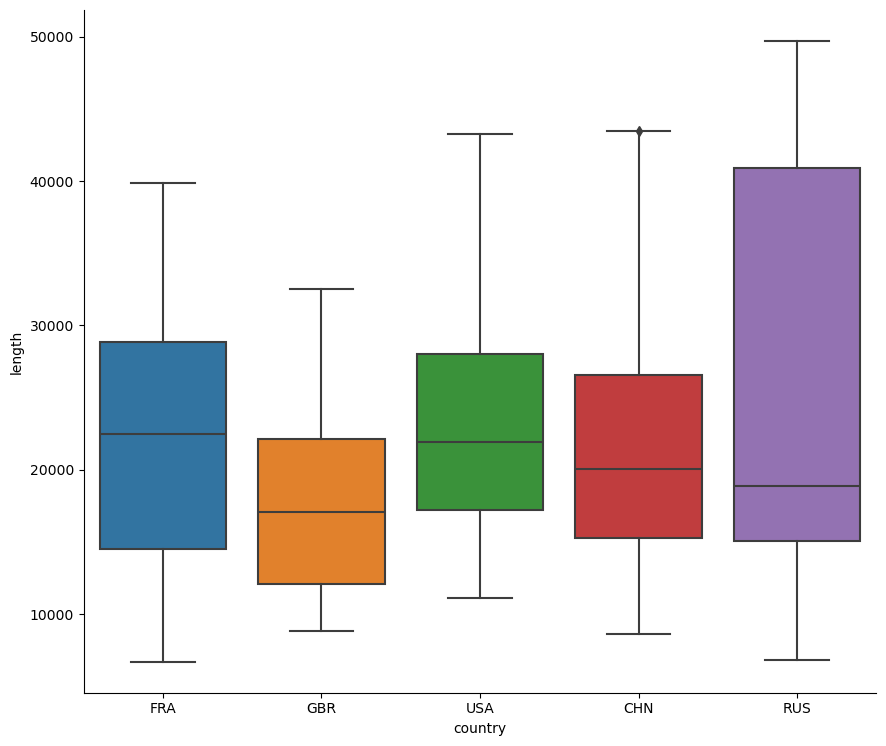

In [18]:
# Plotting boxplot for the column countries ['USA', 'FRA', 'GBR', 'CHN', 'RUS']
import seaborn as sns
where = data['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=data[where], x="country", y="length", kind='box')
g.fig.set_size_inches(10, 8)

TEXT PREPROCESSING OR TEXT CLEANING

In [19]:
# Importing the stopwords from the nltk library
import nltk
nltk.download('stopwords')
stopwords= set(nltk.corpus.stopwords.words('english'))
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
# importing regular expression 
import re

# Creating the tokenize function
def tokenize(text):
    return re.findall(r'[\w-]*[a-zA-Z][\w-]*', text)



In [21]:
# Passing a sentence to break down into tokens
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


In [22]:
# Creating the function for the stopwords removal
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


In [23]:
# creating pipeline
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    # Apply each function in the pipeline to the text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [24]:
data['tokens'] = data['text'].apply(prepare, pipeline=pipeline)


In [25]:
data['tokens']

0       [may, first, convey, president, congratulation...
1       [fortunate, coincidence, precisely, time, unit...
2       [pleasure, extend, mr, president, warmest, con...
3       [may, begin, expressing, ambassador, hambro, b...
4       [doubt, us, coming, rostrum, wonders, usefulne...
                              ...                        
7502    [behalf, people, government, yemen, would, lik...
7503    [seventy, years, passed, since, establishment,...
7504    [like, congratulate, president, country, denma...
7505    [would, like, begin, thanking, secretary-gener...
7506    [allow, outset, extend, mr, mogens, lykketoft,...
Name: tokens, Length: 7507, dtype: object

In [26]:
# Creating a new column num_tokens
data['num_tokens'] = data['tokens'].map(len)
data.tail()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,10568,"[behalf, people, government, yemen, would, lik...",894
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,25430,"[seventy, years, passed, since, establishment,...",2118
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,13662,"[like, congratulate, president, country, denma...",1160
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,14247,"[would, like, begin, thanking, secretary-gener...",1197
7506,70,2015,ZWE,Zimbabwe,Robert Mugabe,President,Allow me at the outset to extend to Mr. Mogens...,11013,"[allow, outset, extend, mr, mogens, lykketoft,...",903


# Word frequencyAnalysis

In [27]:
# importing the counter from counter
from collections import Counter
tokens = tokenize("She likes my cats and my cats like my sofa.")
testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [28]:
#You can also add new data to the currentcount
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [29]:
counter = Counter()
data['tokens'].map(counter.update)
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


In [30]:
#Now, we put the word frequency in it’s owndataframe for analysis
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [31]:
#Sort and display
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


In [32]:
# Statistical Discription
freq_df.describe()

,freq
count,68294.000000
mean,162.705186
std,1544.169618
min,1.000000
25%,1.000000
50%,2.000000
75%,15.000000
max,124508.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

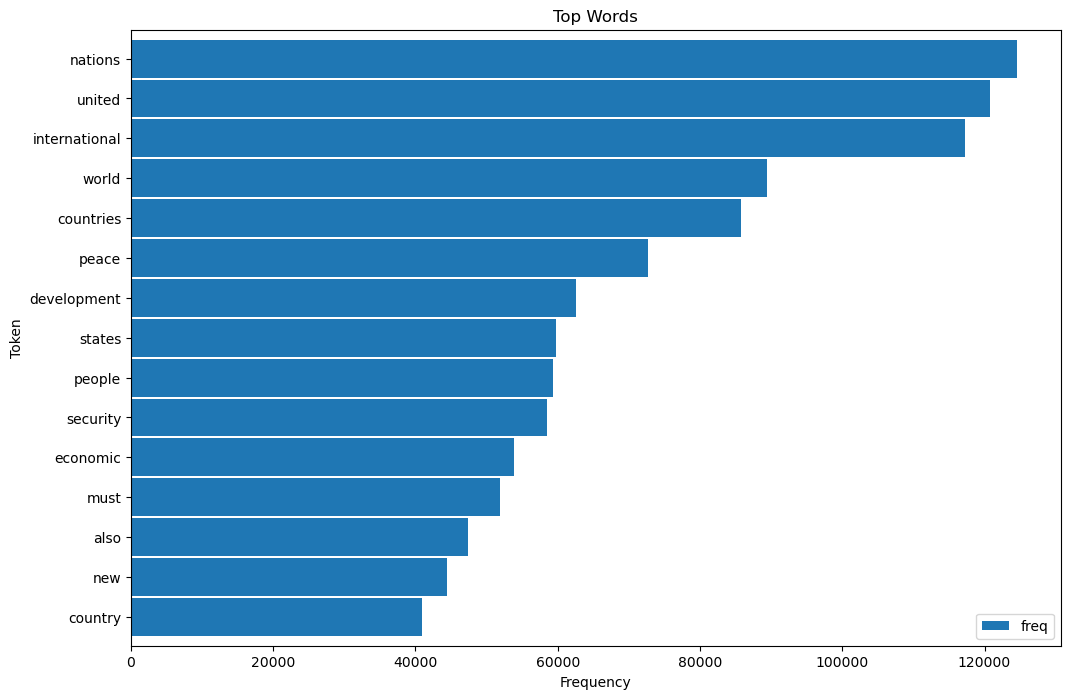

In [33]:
# Bar chart
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [35]:
# installing the wordcloud 
!pip install wordcloud

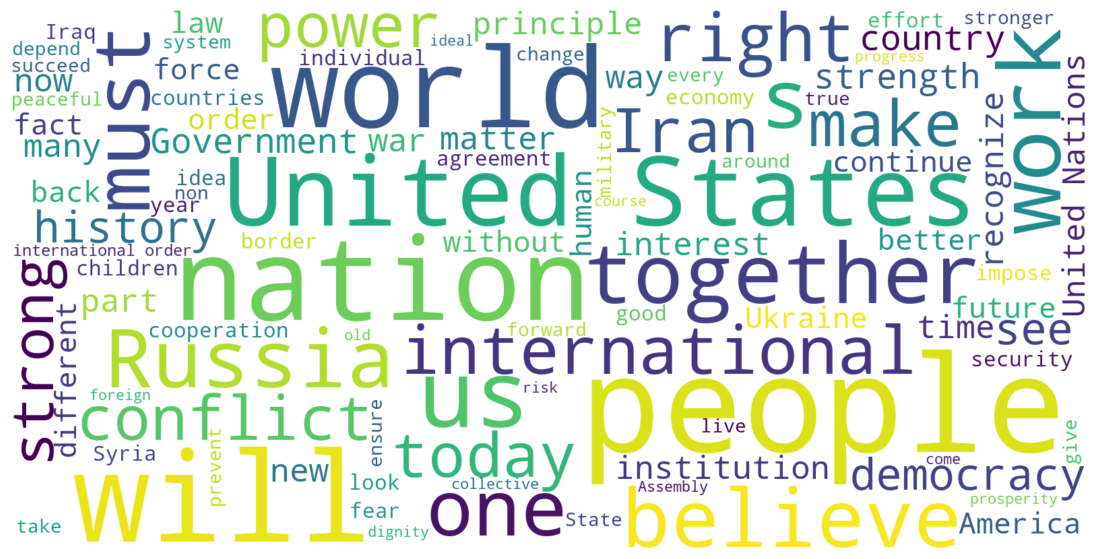

In [37]:
from wordcloud import WordCloud, STOPWORDS


# Ensure stopwords is defined
stopwords = set(STOPWORDS)

# Filter the text data
text = data.query("year==2015 and country=='USA'")['text'].values[0]

# Set up the word cloud parameters
wc = WordCloud(
    width=1600, height=800,  # Increase the resolution
    max_words=100,
    stopwords=stopwords,
    max_font_size=200,
    min_font_size=10,
    background_color='white',  # White background for better clarity
    colormap='viridis'  # Color map for better contrast
)

# Generate the word cloud
wc.generate(text)

# Plot the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


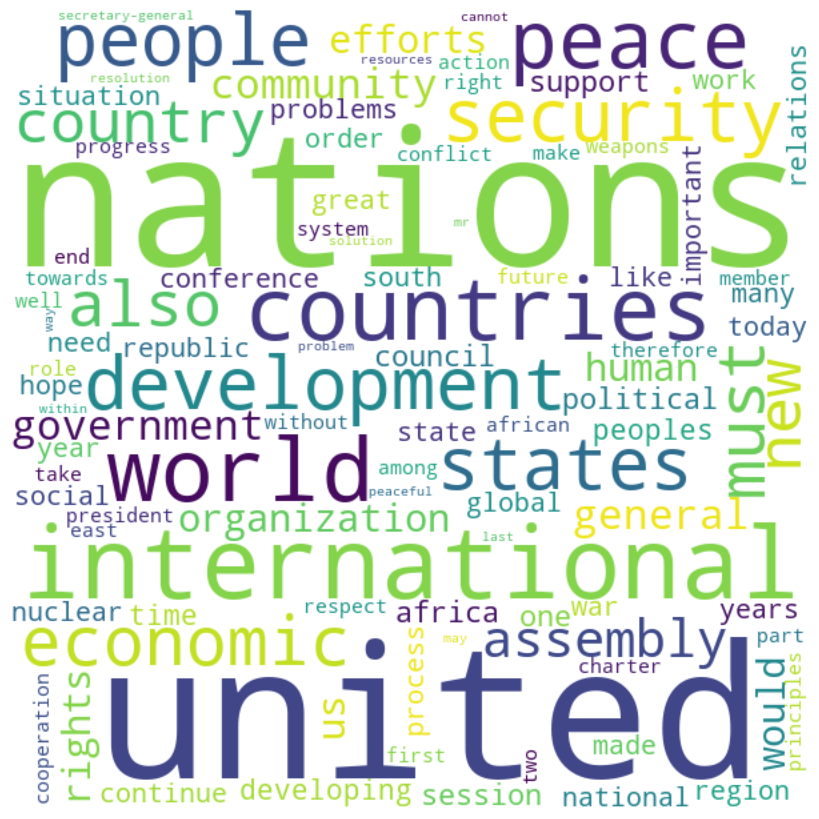

In [38]:
from wordcloud import WordCloud



# Create the word cloud object with specified parameters
wc = WordCloud(
    background_color='white',  # White background for better clarity
    width=600,  # Increased width for better resolution
    height=600,  # Increased height for better resolution
    max_words=100,
    margin=2,
    max_font_size=200,
    min_font_size=10,
    colormap='viridis'  # Color map for better contrast
)

# Generate the word cloud from the frequency dictionary
wc.fit_words(freq_df['freq'].to_dict())

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
